In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

labels = ["apple", "tree", "pizza", "eiffel_tower", "donut", "fish", "wine_glass", "dog", "smiley", "carrot", "t_shirt", "cactus", "bed"]

2023-03-15 00:36:10.028470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def plot_sample(x, y, index):
    image = x[index].reshape(28, 28) * 255
    plt.imshow(image, cmap="gray")
    plt.title(labels[int(y[index])])
    plt.show()

In [5]:
def all_labels(dir_path):
    final_list = ""
    for filename in os.listdir(dir_path):
        final_list += '"' + filename.split(".")[0] + '", '
    
    return final_list

print(all_labels("data"))

"apple", "tree", "pizza", "eiffel_tower", "donut", "fish", "wine_glass", "dog", "smiley", "carrot", "t_shirt", "cactus", "bed", 


In [3]:
# small: 8000, medium: 18000, large: 10000
def load_data(dir_path):
    x_train = np.empty((0, 784))
    y_train = np.empty((0,))
    x_test = np.empty((0, 784))
    y_test = np.empty((0,))
    for i, filename in enumerate(os.listdir(dir_path)):
        data = np.load(os.path.join(dir_path, filename))[0:80000]
        train_data = data[0:70000]
        test_data = data[70000:80000]
        
        label = np.ones(data.shape[0])*i
        x_train = np.concatenate([x_train, train_data])
        y_train = np.concatenate([y_train, np.ones(train_data.shape[0])*i])
        x_test = np.concatenate([x_test, test_data])
        y_test = np.concatenate([y_test, np.ones(test_data.shape[0])*i])
    
    return x_train, y_train, x_test, y_test

In [19]:
def list_data(dir_path):
    for i, filename in enumerate(os.listdir(dir_path)):
        data = np.load(os.path.join(dir_path, filename))
        print(data.shape)

list_data("data")

(144722, 784)
(144721, 784)
(130371, 784)
(134801, 784)
(140751, 784)
(134150, 784)
(132302, 784)
(152159, 784)
(124386, 784)
(132459, 784)
(125233, 784)
(131676, 784)
(113862, 784)


In [4]:
x_train, y_train, x_test, y_test = load_data("data")

In [5]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
x_train, x_test = x_train/255, x_test/255

# Generate a random permutation of the indices
perm = np.random.permutation(x_train.shape[0])

# Shuffle both arrays in the same way
x_train = x_train[perm]
y_train = y_train[perm]

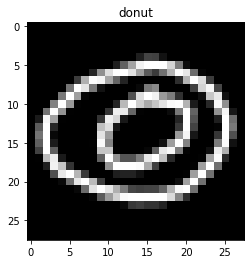

In [6]:
plot_sample(x_train, y_train, 90)

In [7]:
model = models.Sequential([
  layers.Flatten(input_shape=(784,)),
  layers.Dense(1024, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(13, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
28438/28438 [==============================] - 333s 12ms/step - loss: 0.3690 - accuracy: 0.8900
Epoch 2/5
28438/28438 [==============================] - 313s 11ms/step - loss: 0.2644 - accuracy: 0.9226
Epoch 3/5
28438/28438 [==============================] - 324s 11ms/step - loss: 0.2307 - accuracy: 0.9328
Epoch 4/5
28438/28438 [==============================] - 326s 11ms/step - loss: 0.2093 - accuracy: 0.9391
Epoch 5/5
28438/28438 [==============================] - 335s 12ms/step - loss: 0.1945 - accuracy: 0.9442


In [10]:
model.evaluate(x_test, y_test)

4063/4063 [==============================] - 9s 2ms/step - loss: 0.2432 - accuracy: 0.9327


[0.24323593080043793, 0.9326615333557129]

In [45]:
y_pred = [np.argmax(prediction) for prediction in model.predict(x_test)]

407/407 [==============================] - 1s 1ms/step


In [47]:
y_pred[140:4000]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [114]:
y_test[0:5]

array([0, 0, 0, 0, 0])

In [16]:
model.save('doodle_model_medium.h5')